<a href="https://colab.research.google.com/github/aquapirate/worksheet0/blob/main/2408239_Nikisha_Shrestha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#3.1-Getting started with data exploration
#1.Data Exploration and understanding
#Dataset Overview
#1.Load the dataset and display the first 10 rows.
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/AIWeek2/WHR-2024-5CS037.csv")
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
#2.Identify the number of rows and columns in the dataset.
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 143
Number of columns: 9


In [ ]:
#3.List all the columns and their data types.
print("The columns along with thier datatypes:")
print(df.dtypes)

The columns along with thier datatypes:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [ ]:
#Basic Statistics
#1.Calculate the mean, median, and standard deviation for the Score column.
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()
print("Mean Score:", mean_score)
print("Median Score:", median_score)
print("Standard Deviation Score:", std_score)

Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation Score: 1.1707165099442995


In [ ]:
#2.Identify the country with the highest and lowest happiness scores.
highest_score_country = df.loc[df['score'].idxmax()]
lowest_score_country = df.loc[df['score'].idxmin()]
print(f"Highest score country: {highest_score_country['Country name']}, Score: {highest_score_country['score']}")
print(f"Highest score country: {lowest_score_country['Country name']}, Score: {lowest_score_country['score']}")


Highest score country: Finland, Score: 7.741
Highest score country: Afghanistan, Score: 1.721


In [ ]:
#Missing Values:
#1. Check if there are any missing values in the dataset. If so, display the total count for each column.
missing_vales = df.isnull().sum()
print("Missing values in each columns: ", missing_vales)

Missing values in each columns:  Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
#filling missing values
df['Log GDP per capita'] = df['Log GDP per capita'].fillna(df['Log GDP per capita'].mean())
df['Social support'] = df['Social support'].interpolate(methos='linear')
df['Healthy life expectancy'] = df['Healthy life expectancy'].fillna(df['Healthy life expectancy'].median())
df['Freedom to make life choices'] = df['Freedom to make life choices'].fillna(df['Freedom to make life choices'].mode()[0])
df['Generosity'] = df['Generosity'].fillna(method='ffill')
df['Perceptions of corruption'] = df['Perceptions of corruption'].fillna(method='bfill')
df['Dystopia + residual'] = df['Dystopia + residual'].fillna(0)

missing_vales = df.isnull().sum()
print("Missing values in each columns: ", missing_vales)

Missing values in each columns:  Country name                    0
score                           0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
dtype: int64


<ipython-input-17-c32afbbafe8b>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Generosity'] = df['Generosity'].fillna(method='ffill')
<ipython-input-17-c32afbbafe8b>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Perceptions of corruption'] = df['Perceptions of corruption'].fillna(method='bfill')


In [ ]:
#Filtering and Sorting
#1.Filter the dataset to show only the countries with a Score greater than 7.5
highest_score_countries = df[df['score'] > 7.5]
print(highest_score_countries)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [ ]:
#2.For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.
sorted_countries = highest_score_countries.sort_values(by='Log GDP per capita', ascending=False)
top_10_countries = sorted_countries.head(10)
print(top_10_countries)

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [ ]:
#Adding new columns
#1.Create a new column called Happiness_Category that catgorizes into three categories based on thier score
df['Happiness_Category'] = pd.cut(df['score'], bins = [-float('inf'), 4, 6, float('inf')], labels = ['Low', 'Medium', 'High'])
print(df[['Country name', 'score', 'Happiness_Category']])

         Country name  score Happiness_Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


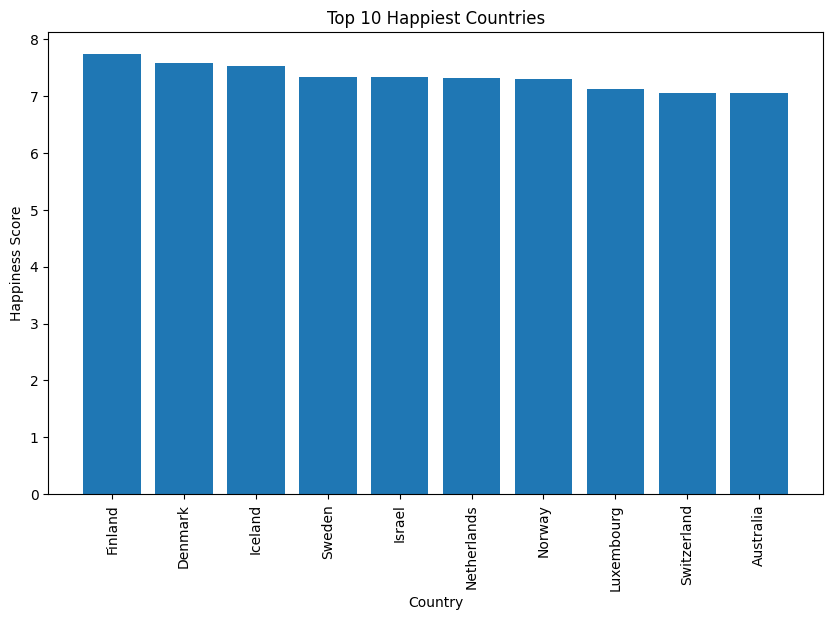

In [ ]:
#Data Visualization
#Bar Plot
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/AIWeek2/WHR-2024-5CS037.csv")

top_10_happiest = df.sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'])

plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Happiest Countries')
plt.xticks(rotation=90)
plt.show()

The above bar plot demonstrates the top 10 happiest countries.

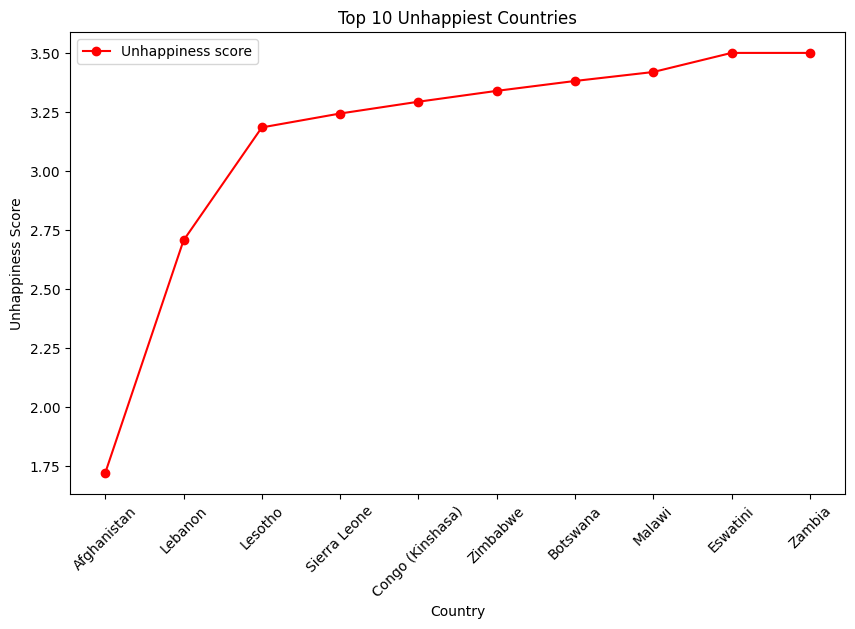

In [ ]:
#Line Plot
top_10_unhappiest = df.sort_values(by='score', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='red', label='Unhappiness score')

plt.xlabel('Country')
plt.ylabel('Unhappiness Score')
plt.title('Top 10 Unhappiest Countries')
plt.xticks(rotation=45)
plt.legend()
plt.show()

The above line plot demonstrates the top 10 unhappiest countries.

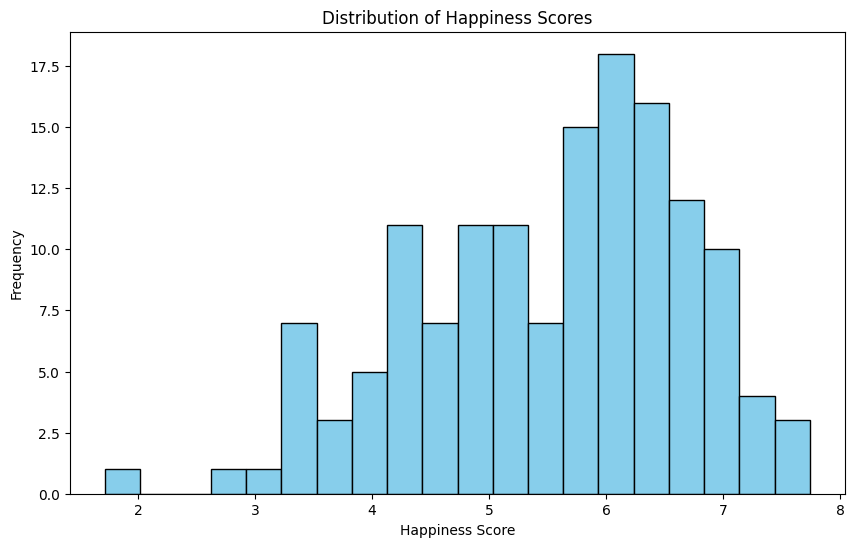

In [ ]:
#Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.show()

The above histogram demonstrates the distribution of happiness score.

INTERPRETATION

Since, the histogram is skewed to the right, most countries have lower happiness scores with a few having very high happiness scores.

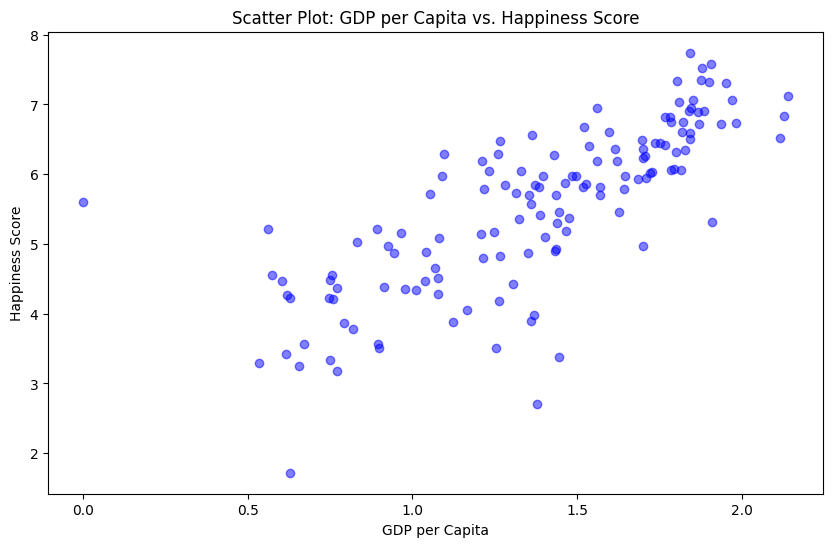

In [ ]:
#Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Log GDP per capita'], df['score'], alpha=0.5, color='blue')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot: GDP per Capita vs. Happiness Score')
plt.show()

The above scatter plot visualizes the relationship between GDP per Capita and Score. Since the points slope upwards, it indicates a positive correlation between GDP per Capita and Happiness Score. This suggests that as a country's GDP per capita increases, its happiness score tends to increase as well.

In [ ]:
#3.2-Some Advance Data Exploration Task
#Task1-Setup Task-Preparing the South-Asia Dataset
#1.Define the countries in South Asia with a list
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/AIWeek2/WHR-2024-5CS037.csv")

south_asia_countries = ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan', 'Maldives', 'Afghanistan']


In [ ]:
#2.Use the list from step-1 to filter the dataset [i.e. filter out matching dataset from list.]
south_asia_data = df[df['Country name'].isin(south_asia_countries)]
print(south_asia_data)


output_file_path = 'south_asian_countries.csv'
south_asia_data.to_csv(output_file_path, index=False)
print(f"Filtered dataset saved to {output_file_path}")

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

In [ ]:
#Task2-Composite Score Ranking
#1.Using the SouthAsia DataFrame, create a new column called Composite Score that combines the matrics:
#Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy
south_asia_data = df[df['Country name'].isin(south_asia_countries)].copy()
south_asia_data['Composite score'] = (0.40 * south_asia_data['Log GDP per capita'] + 0.30 * south_asia_data['Social support'] + 0.30 * south_asia_data['Healthy life expectancy'])
print("Composite Score:\n ", south_asia_data)

Composite Score:
      Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of 

In [ ]:
#2.Rank the South Asian countries based on the Composite Score in descending order.
sorted_composite_descending = south_asia_data.sort_values(by='Composite score', ascending=False)
print("South asian countires based on the Composite score in descending order:\n ", sorted_composite_descending)

#ranking of the south asian countries based on their score in descending order.
sorted_score_descending = south_asia_data.sort_values(by='score', ascending=False)
print("South asian countires based on the score in descending order:\n ", sorted_score_descending)

South asian countires based on the Composite score in descending order:
      Country name  score  Log GDP per capita  Social support  \
127    Sri Lanka  3.898               1.361           1.179   
92         Nepal  5.158               0.965           0.990   
125        India  4.054               1.166           0.653   
107     Pakistan  4.657               1.069           0.600   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
127                    0.586                         0.583       0.144   
92                     0.443                         0.653       0.209   
125                    0.417                         0.767       0.174   
107                    0.321                         0.542       0.144   
128                    0.513                         0.775       0.140   
142                    0.242            

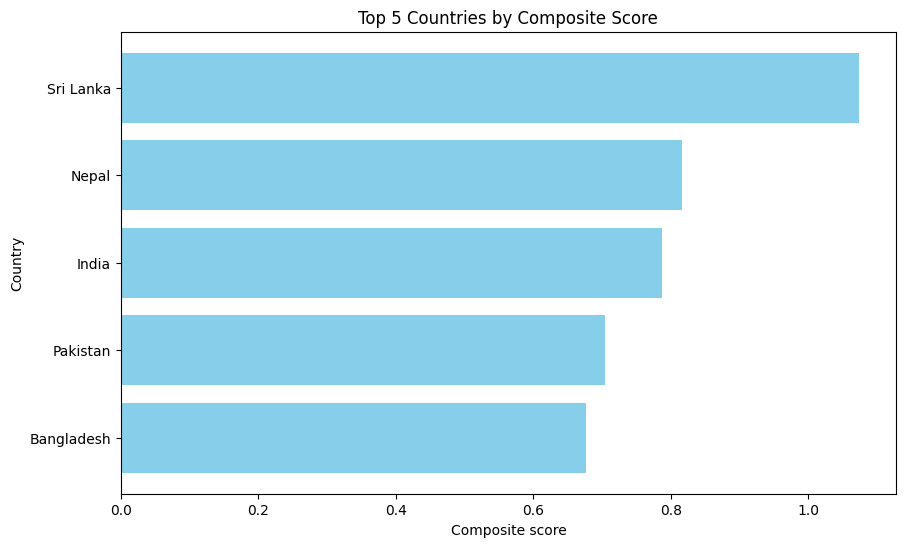

In [ ]:
#3.Visualize the top 5 countries using a horizontal bar chart showing the Composite score.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_5_countries = sorted_composite_descending.head(5)
plt.barh(top_5_countries['Country name'], top_5_countries['Composite score'], color='skyblue')
plt.xlabel('Composite score')
plt.ylabel('Country')
plt.title('Top 5 Countries by Composite Score')
plt.gca().invert_yaxis()
plt.show()

The above horizontal bar chart shows top 5 countries with its composite score.

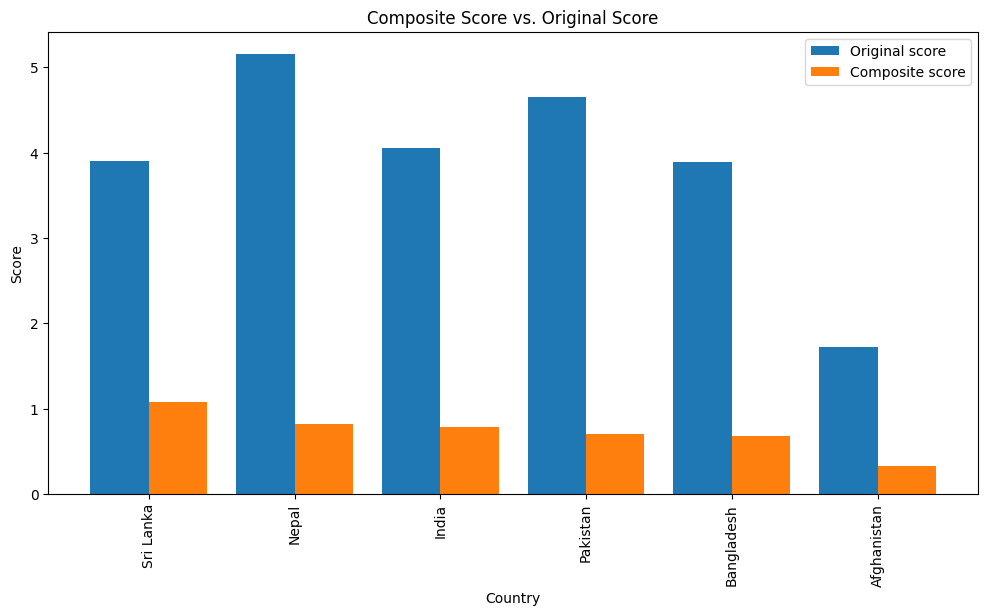

Plot1:This bar graph shows composite score in a descending order.


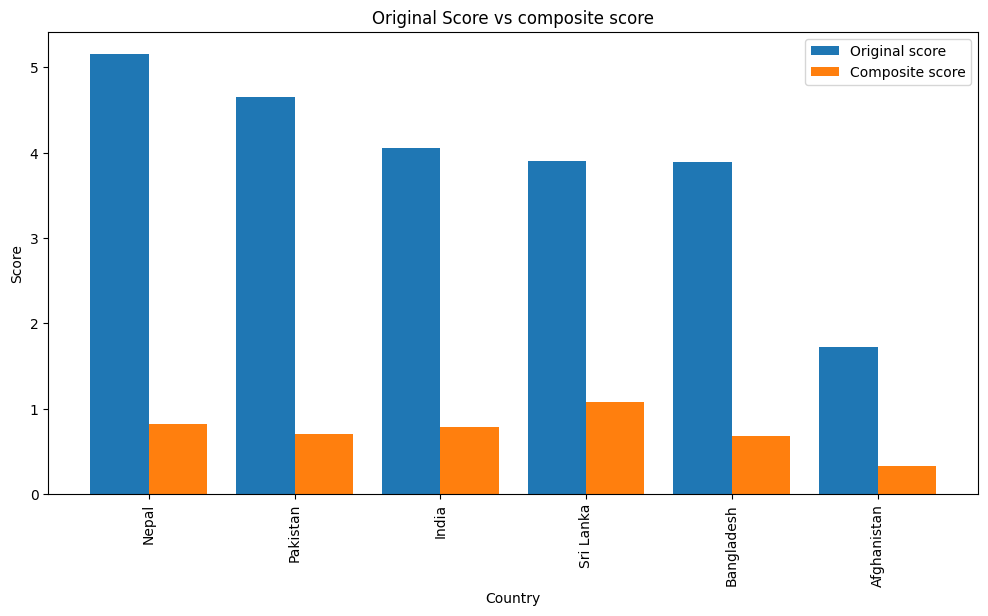

Plot2:This bar graph shows score in a descending order.
Correlation between Composite Score and Original Score: 0.6843877715791373


In [ ]:
#4.Discuss whether the rankings based on the conposite score align with the original score
south_asia_data = south_asia_data.sort_values(by='Composite score', ascending=False)
plt.figure(figsize=(12, 6))
x = np.arange(len(south_asia_data))
plt.bar(x-0.2, south_asia_data['score'], width=0.4, label='Original score')
plt.bar(x+0.2, south_asia_data['Composite score'], width=0.4, label='Composite score')
plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Composite Score vs. Original Score')
plt.xticks(x, south_asia_data['Country name'], rotation=90)
plt.legend()
plt.show()
print("Plot1:This bar graph shows composite score in a descending order.")

south_asia_data = south_asia_data.sort_values(by='score', ascending=False)
plt.figure(figsize=(12, 6))
x = np.arange(len(south_asia_data))
plt.bar(x-0.2, south_asia_data['score'], width=0.4, label='Original score')
plt.bar(x+0.2, south_asia_data['Composite score'], width=0.4, label='Composite score')
plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Original Score vs composite score')
plt.xticks(x, south_asia_data['Country name'], rotation=90)
plt.legend()
plt.show()
print("Plot2:This bar graph shows score in a descending order.")

correlation = south_asia_data['Composite score'].corr(south_asia_data['score'])
print("Correlation between Composite Score and Original Score:", correlation)



According to the above visualization plot, there is a misalignment in the rankings based on the composite score and the original score. In visualization plot(1), the composite score is plotted in descending order, but the original score deviates from this order. This can be demonstrated as Srilanka, the country ranked 1st based on the composite score, ranks 4th based on the original score as depicted by plot(1) and plot(2) respectively.

Differences in the calculation of the composite score and the original score may cause this misalignment. While the composite score is calculated from GDP per capita, social support, and healthy life expectancy, the original score may rely on different factors altogether.

However, a moderately strong positive correlation (0.6844) suggests that countries with higher composite scores tend to have higher original scores despite the misalignment in their rankings.




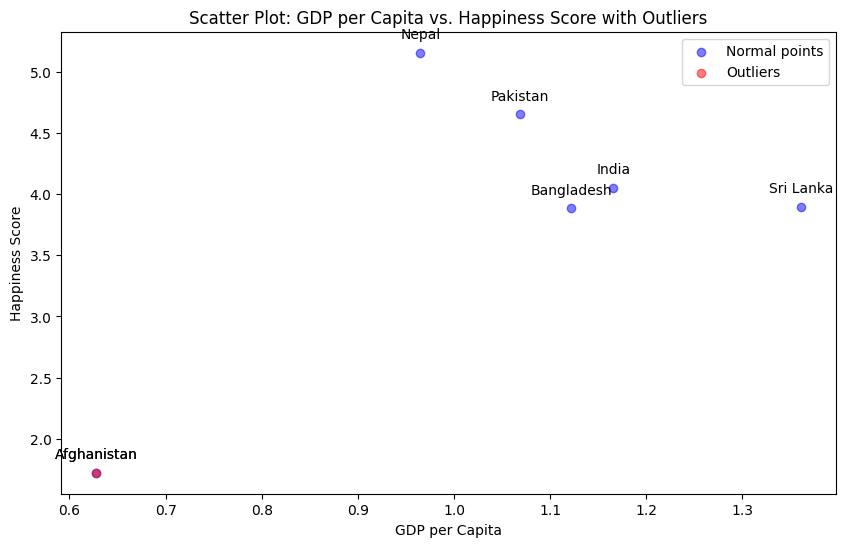

Outlier Countries: 
142    Afghanistan
Name: Country name, dtype: object


In [ ]:
#Task3 - Outlier Detection
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/AIWeek2/WHR-2024-5CS037.csv")

south_asia_countries = ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan', 'Maldives', 'Afghanistan']
south_asia_data = df[df['Country name'].isin(south_asia_countries)].copy()

gdp_column = 'Log GDP per capita'
score_column = 'score'

def detect_outliers(data, column):
  """
  detects outliers in the given column of the dataframe using 1.5 * IQR method

  parameters:
  data: datafarme in which to detect outliers
  column: the column name to check for outliers

  returns:
  dataframe containing rows with outliers in the specified column(either below the lower bound or above the upper bound).
  """
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers_gdp = detect_outliers(south_asia_data, gdp_column)
outliers_score = detect_outliers(south_asia_data, score_column)

outliers = pd.concat([outliers_gdp, outliers_score]).drop_duplicates()

plt.figure(figsize=(10,6))
# plot normal points
plt.scatter(south_asia_data[gdp_column], south_asia_data[score_column], alpha=0.5, color='blue', label='Normal points')
# plot outliers
plt.scatter(outliers[gdp_column], outliers[score_column], alpha=0.5, color='red', label='Outliers')

for i, row in south_asia_data.iterrows():
  plt.annotate(row['Country name'], (row[gdp_column], row[score_column]), textcoords="offset points", xytext=(0, 10), ha='center')
# add labels to outliers
for i, row in outliers.iterrows():
  plt.annotate(row['Country name'], (row[gdp_column], row[score_column]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot: GDP per Capita vs. Happiness Score with Outliers')
plt.legend()
plt.show()

print("Outlier Countries: ")
print(outliers['Country name'])


The above scatter plot demonstrates Afghanistan to be the sole outlier among all the South Asian countries based on GDP per capita and happiness score. Afghanistan has an extremely low GDP per capita and happiness score. This may be due to its prolonged conflict, political instability, and economic crises, leading the people in Afghanistan to suffer harsh consequences.


Due to Afghanistan's low GDP per capita and happiness score, the regional averages of the South Asian countries based on GDP per capita and happiness score are heavily distorted. This might mislead South Asian countries to appear poorer and less happy than it is. This may even lead to poor policy decisions and misallocation of resources, affecting the development priorities in other countries.

In [ ]:
#Task4
#Question1
correlation_freedom = south_asia_data['score'].corr(south_asia_data['Freedom to make life choices'])
correlation_generosity = south_asia_data['score'].corr(south_asia_data['Generosity'])
print(f"Pearson correlation between score and freedom to make life choices: {correlation_freedom}")
print(f"Pearson correlation between score and generosity: {correlation_generosity}")

Pearson correlation between score and freedom to make life choices: 0.8005185224163315
Pearson correlation between score and generosity: 0.874512371253192


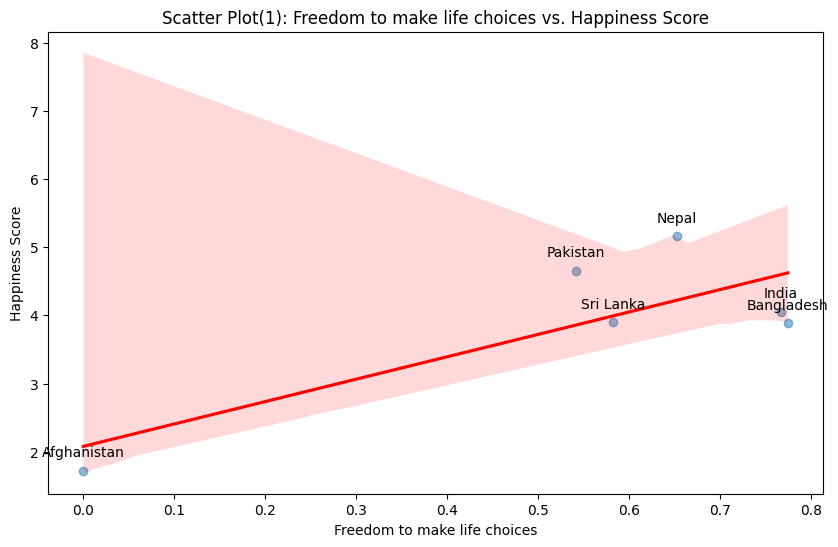

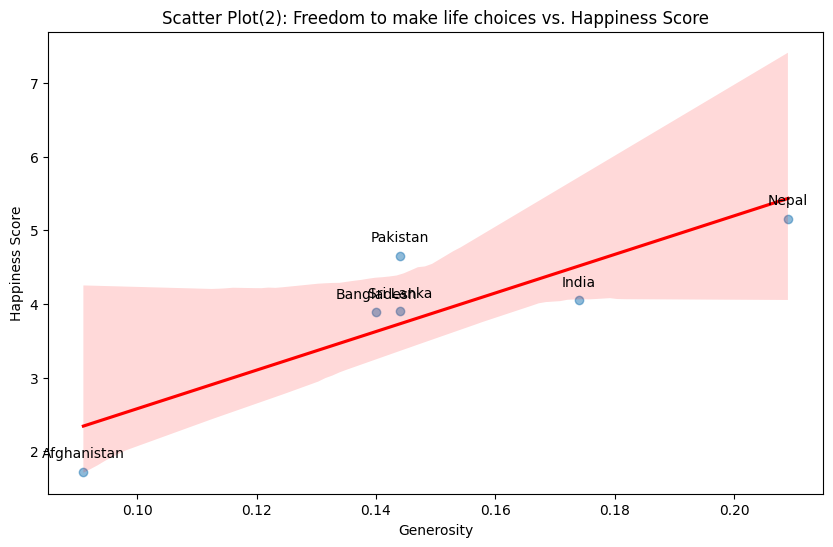

In [ ]:
#Question2
import seaborn as sns

plt.figure(figsize=(10,6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot(1): Freedom to make life choices vs. Happiness Score')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')

for i, rows in south_asia_data.iterrows():
  plt.annotate(rows['Country name'], (rows['Freedom to make life choices'], rows['score']), textcoords="offset points", xytext=(0, 10), ha='center')
plt.show()

plt.figure(figsize=(10,6))
sns.regplot(x='Generosity', y='score', data=south_asia_data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot(2): Freedom to make life choices vs. Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

for i, rows in south_asia_data.iterrows():
  plt.annotate(rows['Country name'], (rows['Generosity'], rows['score']), textcoords="offset points", xytext=(0, 10), ha='center')
plt.show()


The above plot(1) demonstrates the graph between freedom to make life choices and happiness score whereas plot(2) demonstrates the graph between generosity and happiness score.

Both generosity and freedom to make life choices show a strong positive correlation with happiness but according to numbers, generosity(0.87) has the stronger correlation with happiness as compared to freedom to make life choices(0.80).

In [ ]:
#Task5
#Question1
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']
print(south_asia_data[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

    Country name  Log GDP per capita  score  GDP-Score Gap
92         Nepal               0.965  5.158         -4.193
107     Pakistan               1.069  4.657         -3.588
125        India               1.166  4.054         -2.888
127    Sri Lanka               1.361  3.898         -2.537
128   Bangladesh               1.122  3.886         -2.764
142  Afghanistan               0.628  1.721         -1.093


In [ ]:
#Question2
ascending_gap = south_asia_data[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap', ascending=True)
print("Ascending: ",ascending_gap)
descending_gap = south_asia_data[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap', ascending=False)
print("Descending: ", descending_gap)

Ascending:      Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093
Descending:      Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


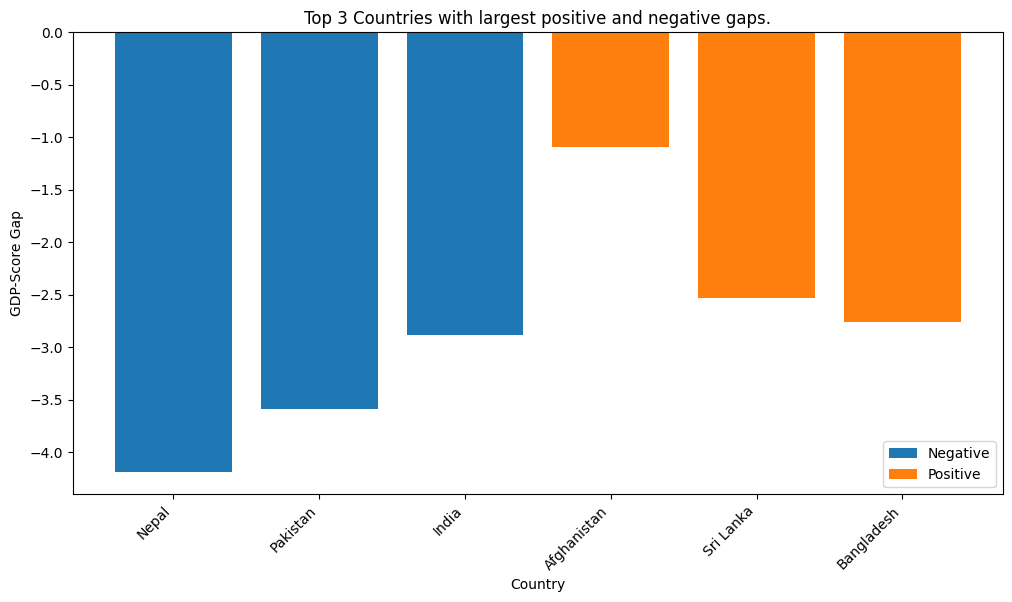

In [ ]:
#Question3
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/AIWeek2/WHR-2024-5CS037.csv")

south_asia_countries = ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan', 'Maldives', 'Afghanistan']
south_asia_data = df[df['Country name'].isin(south_asia_countries)].copy()
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

largest_positive_gap = south_asia_data[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap', ascending=False).head(3)
largest_negative_gap = south_asia_data[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap', ascending=True).head(3)

combined_data = pd.concat([largest_positive_gap.assign(Gap_Type='Positive'), largest_negative_gap.assign(Gap_Type='Negative')])

plt.figure(figsize=(12,6))
for gap_type, group_data in combined_data.groupby('Gap_Type'):
  plt.bar(group_data['Country name'], group_data['GDP-Score Gap'], label=gap_type)

plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.title('Top 3 Countries with largest positive and negative gaps.')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


The above graph demonstrates the top 3 countries having largest positive and negative GDP-Score Gap.

#Question4
Based on the above data, all South Asian countries have negative GDP-score gap, highlighting the happiness score of each country to be greater than its economic wellbeing.
This suggests that the policy makers should focus on increasing the economic situation of the countries to align it with happiness score.

Countries with larger negative gaps like Nepal has comparatively low economic stability as compared to its happiness score whereas countries with larger positive gaps like Afghanistan suggest the alignment of economic prosperity with happiness score, reflecting positive relationship between these two factors.

Therefore, the policy makers have to thoroughly analyze these gaps and ensure proper development according to the needs of each country.






In [ ]:
#Problem3-Comparative Analysis
#Task1-Setup Task-Preparing the middle eastern dataset
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/AIWeek2/WHR-2024-5CS037.csv")

middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]
middle_east_data = df[df['Country name'].isin(middle_east_countries)].copy()
print(middle_east_data)



             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661                         0.827 

In [ ]:
#1.Descriptive Statistics
south_asia_countries = ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan', 'Maldives', 'Afghanistan']
south_asia_data = df[df['Country name'].isin(south_asia_countries)].copy()

south_asia_mean = south_asia_data['score'].mean()
south_asia_std = south_asia_data['score'].std()
middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()
print("Mean of south asia: ", south_asia_mean)
print("Mean of middle east: ", middle_east_mean)

print("Standard deviation of south asia: ", south_asia_std)
print("Standard deviation of middle east: ", middle_east_std)

Mean of south asia:  3.895666666666667
Mean of middle east:  5.412100000000001
Standard deviation of south asia:  1.1770690152521504
Standard deviation of middle east:  1.5662011684327144


The middle east asia has higher happiness score on average(5.41) than south asia(3.9). This suggest people of middle east asia report to be happier than prople of south asia.

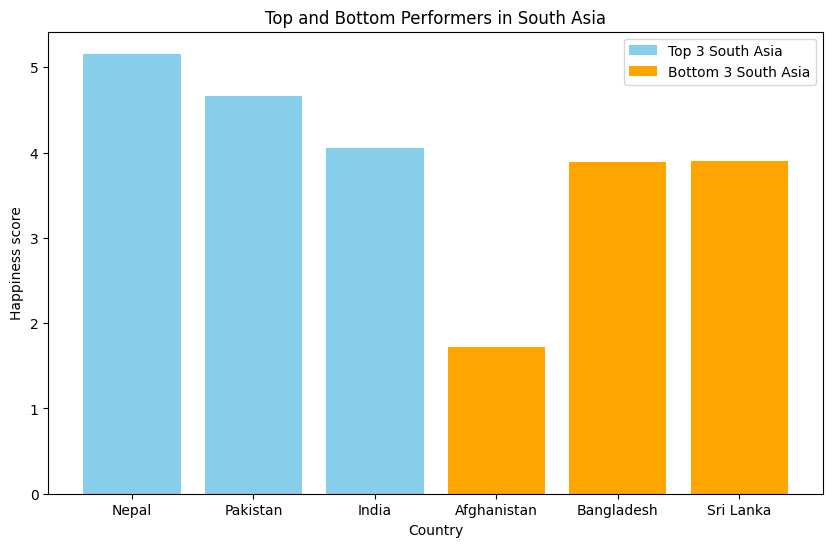

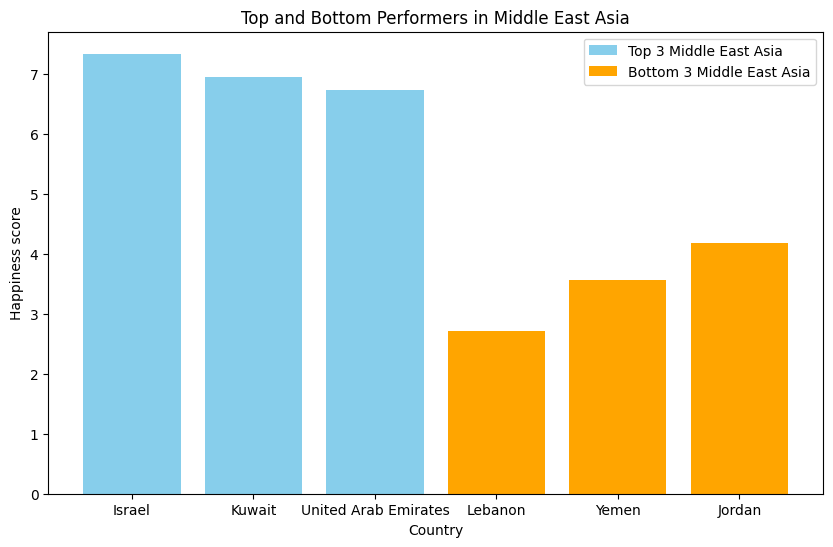

In [ ]:
#2.Top and Bottom Performers
top_south_asia = south_asia_data.nlargest(3, 'score')
bottom_south_asia = south_asia_data.nsmallest(3, 'score')

top_middle_asia = middle_east_data.nlargest(3, 'score')
bottom_middle_east = middle_east_data.nsmallest(3, 'score')

plt.figure(figsize=(10,6))
plt.bar(top_south_asia['Country name'], top_south_asia['score'], color='skyblue', label='Top 3 South Asia')
plt.bar(bottom_south_asia['Country name'], bottom_south_asia['score'], color='orange', label='Bottom 3 South Asia')
plt.title('Top and Bottom Performers in South Asia')
plt.xlabel('Country')
plt.ylabel('Happiness score')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.bar(top_middle_asia['Country name'], top_middle_asia['score'], color='skyblue', label='Top 3 Middle East Asia')
plt.bar(bottom_middle_east['Country name'], bottom_middle_east['score'], color='orange', label='Bottom 3 Middle East Asia')
plt.title('Top and Bottom Performers in Middle East Asia')
plt.xlabel('Country')
plt.ylabel('Happiness score')
plt.legend()
plt.show()

The above plot shows top and bottom performers of south asia and middle east asia respectively.

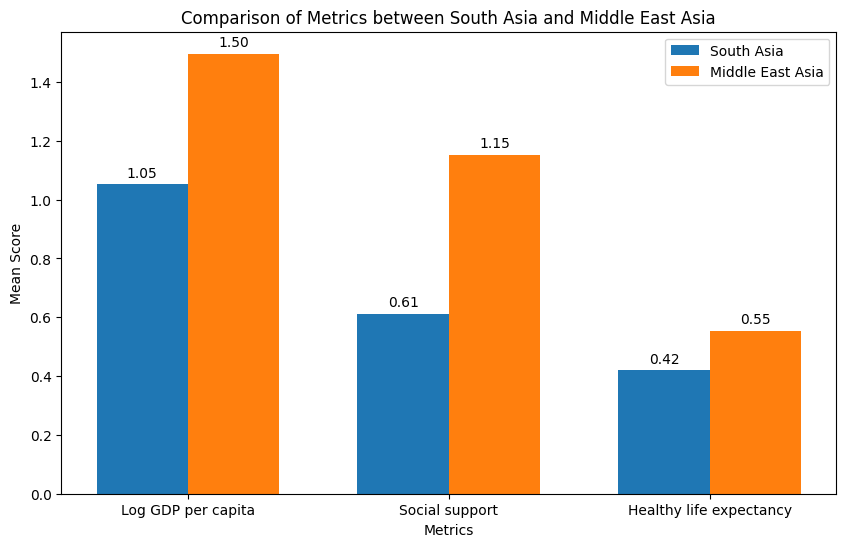

In [ ]:
#3.Metric Comparisons
metrices = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asia_means = south_asia_data[metrices].mean()
middle_east_means = middle_east_data[metrices].mean()

# create grouped bar chart
x = np.arange(len(metrices))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, south_asia_means, width, label='South Asia')
bars2 = ax.bar(x + width/2, middle_east_means, width, label='Middle East Asia')

ax.set_xlabel('Metrics')
ax.set_ylabel('Mean Score')
ax.set_title('Comparison of Metrics between South Asia and Middle East Asia')
ax.set_xticks(x)
ax.set_xticklabels(metrices)
ax.legend()

# add values on top of the bars
for bar in bars1 + bars2:
  height = bar.get_height()
  ax.annotate(f'{height:.2f}',
              xy=(bar.get_x() + bar.get_width() / 2, height),
              xytext=(0, 3),
              textcoords="offset points",
              ha='center', va='bottom')
plt.show()



The above plot shows the comparison of various metrices such as Log GDP per capita, social support, and healthy life expectancy between south asia and middle east asia through the use of the means of respective metrices.

In [ ]:
disparities = abs(south_asia_means - middle_east_means)
largest_disparity_metric = disparities.idxmax()
largest_disparity_value = disparities.max()

print(f"The metric with the largest disparity is '{largest_disparity_metric}' with a difference of {largest_disparity_value:.2f}.")

The metric with the largest disparity is 'Social support' with a difference of 0.54.


In [ ]:
#4.Happiness Disparity
south_asia_score_range = south_asia_data['score'].max() - south_asia_data['score'].min()
middle_east_score_range = middle_east_data['score'].max() - middle_east_data['score'].min()

print("Range of South Asia: ", south_asia_score_range)
print("Range of Middle East Asia: ", middle_east_score_range)

south_asia_score_cv = south_asia_data['score'].std() / south_asia_data['score'].mean()
middle_east_score_cv = middle_east_data['score'].std() / middle_east_data['score'].mean()

print("CV of South Asia: ", south_asia_score_cv)
print("CV of Middle East Asia: ", middle_east_score_cv)


Range of South Asia:  3.4370000000000003
Range of Middle East Asia:  4.634
CV of South Asia:  0.3021482883337427
CV of Middle East Asia:  0.28938880812119405


Since CV of south asia(0.3) is higher than that of middle east aisa(0.29), it can be deducted that south asia has greater variability in happiness.

In [ ]:
#5.Correlation Analysis
south_asia_corr_freedom = south_asia_data['score'].corr(south_asia_data['Freedom to make life choices'])
south_asia_corr_generosity = south_asia_data['score'].corr(south_asia_data['Generosity'])

middle_east_corr_feeedom = middle_east_data['score'].corr(middle_east_data['Freedom to make life choices'])
middle_east_corr_generosity = middle_east_data['score'].corr(middle_east_data['Generosity'])

print("Correlation between score and freedom to make life choices in south asia: ", south_asia_corr_freedom)
print("Correlation between score and generosity in south asia: ", south_asia_corr_generosity)
print("Correlation between score and freedom to make life choices in middle east asia: ", middle_east_corr_feeedom)
print("Correlation between score and generosity in middle east asia: ", middle_east_corr_generosity)


Correlation between score and freedom to make life choices in south asia:  0.8005185224163315
Correlation between score and generosity in south asia:  0.874512371253192
Correlation between score and freedom to make life choices in middle east asia:  0.8632202433827544
Correlation between score and generosity in middle east asia:  0.6275236536964182


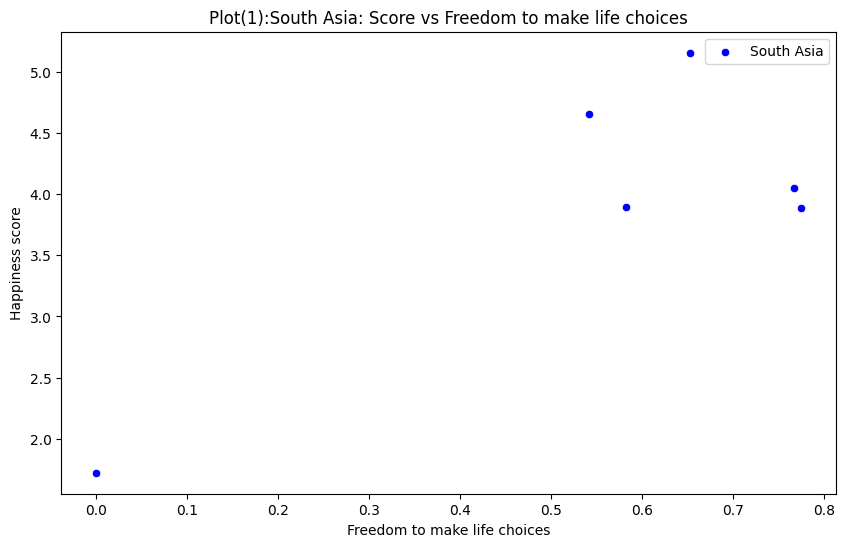

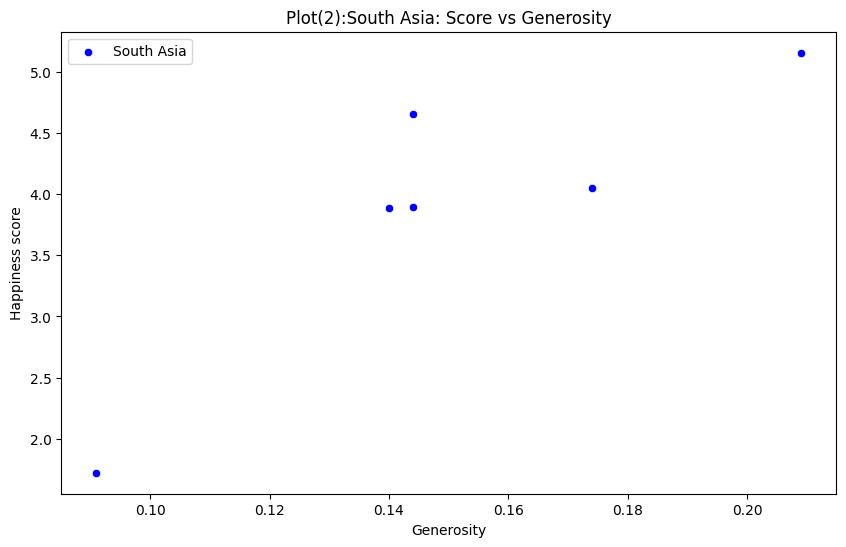

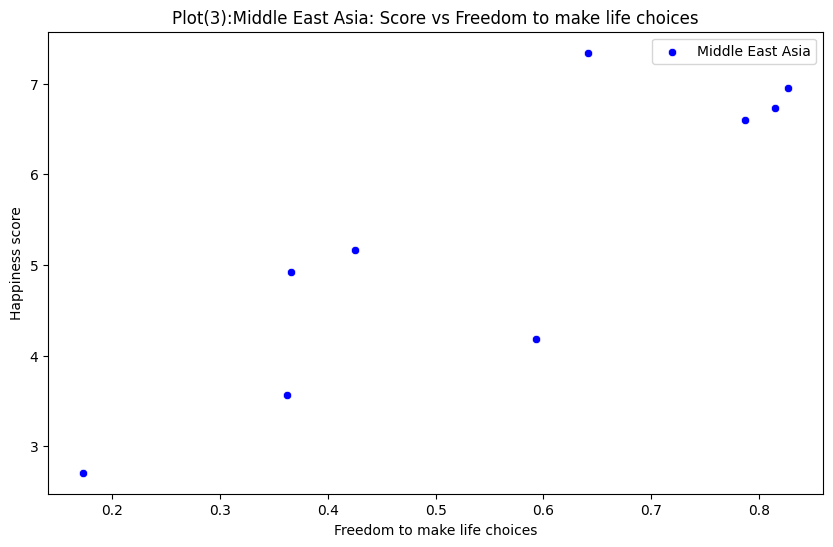

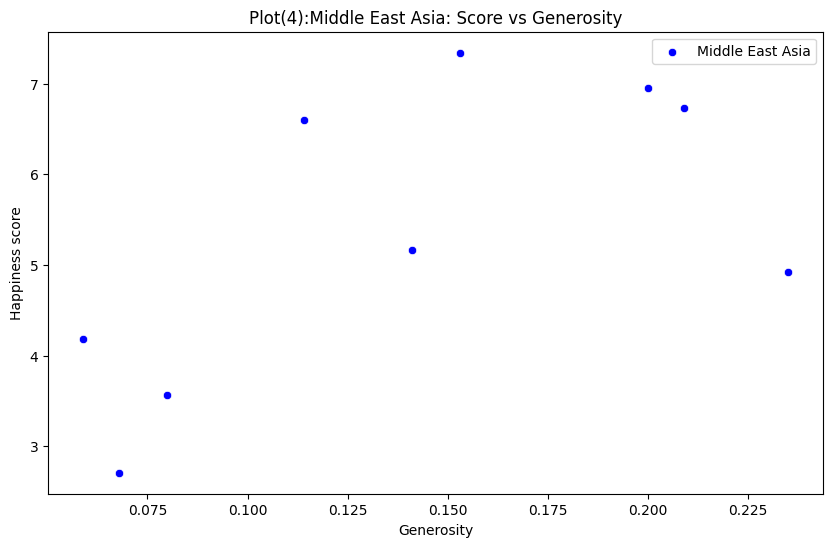

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asia_data, color='blue', label='South Asia')
plt.title('Plot(1):South Asia: Score vs Freedom to make life choices')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness score')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Generosity', y='score', data=south_asia_data, color='blue', label='South Asia')
plt.title('Plot(2):South Asia: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Happiness score')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east_data, color='blue', label='Middle East Asia')
plt.title('Plot(3):Middle East Asia: Score vs Freedom to make life choices')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness score')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Generosity', y='score', data=middle_east_data, color='blue', label='Middle East Asia')
plt.title('Plot(4):Middle East Asia: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Happiness score')
plt.show()

Plot(1) demonstrates the correlation of score with freedom to make life choices for south asia.

Plot(2) demonstrates the correlation of score with generosity for south asia.

Plot(1) demonstrates the correlation of score with freedom to make life choices for middle east asia.

Plot(2) demonstrates the correlation of score with generosity for middle east asia.

South asia

There is a strong positive correlation(0.8) between happiness and freedom to make life choices in south asia. Similarly, there is an even stronger positive correlation(0.87) between happiness and generosity in south asia.

Middle east asia

There is a strong positive correlation(0.86) between happiness and freedom to make life choices in south asia. However there is a moderate positive correlation(0.63) between happiness and generosity in middle east asia.

Therefore, according to the data provided, the correlation between freedom to make life choices and happiness is stronger in middle east aisa compared to south asia whereas the correlation bwetween generosity and happiness is stronger in south asia compared to middle east asia.

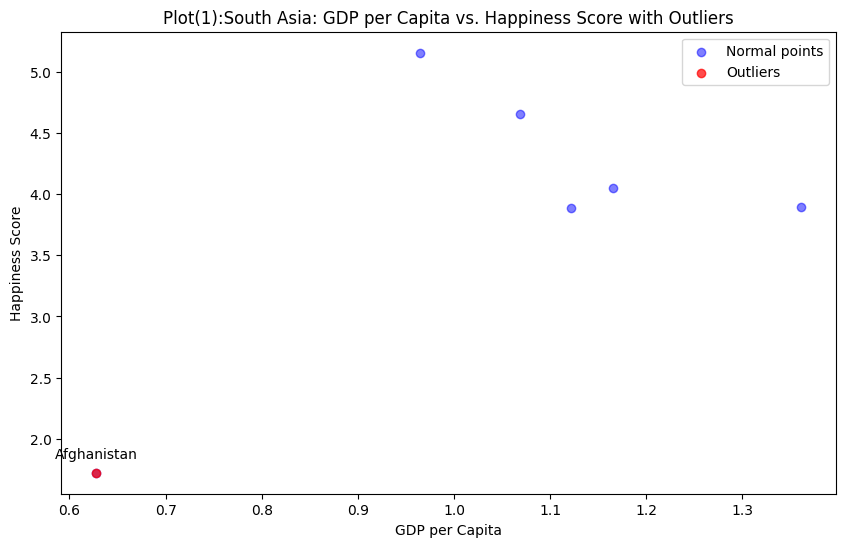

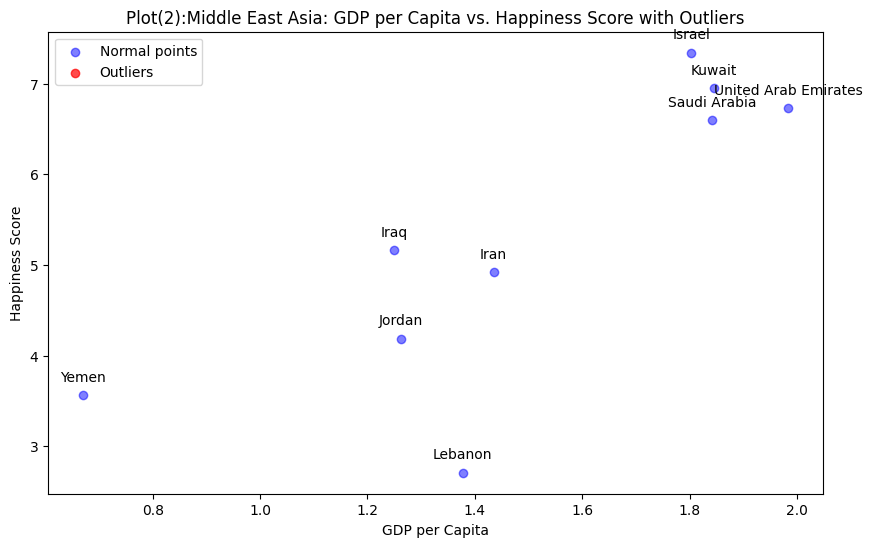

Outlier Countries of South Asia: 
142    Afghanistan
Name: Country name, dtype: object
Outlier Countries of Middle East Asia: 
Series([], Name: Country name, dtype: object)


In [ ]:
#6.Outlier Detection
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/AIWeek2/WHR-2024-5CS037.csv")

south_asia_countries = ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan', 'Maldives', 'Afghanistan']
south_asia_data = df[df['Country name'].isin(south_asia_countries)].copy()

middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

gdp_column = 'Log GDP per capita'
score_column = 'score'

def detect_outliers(data, column):
  """
  detects outliers in the given column of the dataframe using 1.5 * IQR method

  parameters:
  data: datafarme in which to detect outliers
  column: the column name to check for outliers

  returns:
  dataframe containing rows with outliers in the specified column(either below the lower bound or above the upper bound).
  """
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers_gdp_south_asia = detect_outliers(south_asia_data, gdp_column)
outliers_score_south_asia = detect_outliers(south_asia_data, score_column)
outliers_gdp_middle_east = detect_outliers(middle_east_data, gdp_column)
outliers_score_middle_east = detect_outliers(middle_east_data, score_column)

outliers_south_asia = pd.concat([outliers_gdp_south_asia, outliers_score_south_asia]).drop_duplicates()
outliers_middle_east = pd.concat([outliers_gdp_middle_east, outliers_score_middle_east]).drop_duplicates()

plt.figure(figsize=(10,6))

#South asia
# plot normal points
plt.scatter(south_asia_data[gdp_column], south_asia_data[score_column], alpha=0.5, color='blue', label='Normal points')
# plot outliers
plt.scatter(outliers_south_asia[gdp_column], outliers_south_asia[score_column], alpha=0.7, color='red', label='Outliers')

# add labels to outliers
for i, row in outliers_south_asia.iterrows():
  plt.annotate(row['Country name'], (row[gdp_column], row[score_column]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Plot(1):South Asia: GDP per Capita vs. Happiness Score with Outliers')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))

#Middle east asia
# plot normal points
plt.scatter(middle_east_data[gdp_column], middle_east_data[score_column], alpha=0.5, color='blue', label='Normal points')
# plot outliers
plt.scatter(outliers_middle_east[gdp_column], outliers_middle_east[score_column], alpha=0.7, color='red', label='Outliers')

for i, row in middle_east_data.iterrows():
  plt.annotate(row['Country name'], (row[gdp_column], row[score_column]), textcoords="offset points", xytext=(0, 10), ha='center')
# add labels to outliers
for i, row in outliers_middle_east.iterrows():
  plt.annotate(row['Country name'], (row[gdp_column], row[score_column]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Plot(2):Middle East Asia: GDP per Capita vs. Happiness Score with Outliers')
plt.legend()
plt.show()

print("Outlier Countries of South Asia: ")
print(outliers_south_asia['Country name'])
print("Outlier Countries of Middle East Asia: ")
print(outliers_middle_east['Country name'])


The above plots: plot(1) and plot(2) determines the outliers in south asia and middle east asia respectively based on GPD per capita and happiness score. According to the data, Afghanistan is the sole outlier in south Asia whereas none of the countries belonging to middle east asia is an outlier.

The absence of outliers in Middle East Asia is due to the presence of rich, oil-producing countries like UAE and Kuwait as well as economically challenging countries like Yemen, widening the region's IQR, resulting in none of the countries falling out of the range, and finally, the absence of outliers.

Thus, it can be concluded that South Asian countries require attention to Afghanistan's economic stability, whereas Middle Eastern countries require region-wide strategic development rather than focusing on targeted countries.

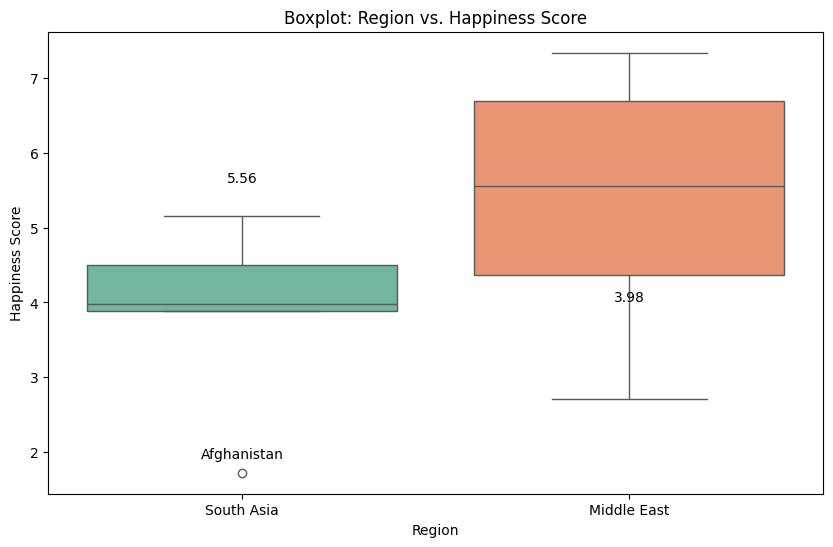

In [ ]:
#Visualization
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/AIWeek2/WHR-2024-5CS037.csv")

south_asia_countries = ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan', 'Maldives', 'Afghanistan']
south_asia_data = df[df['Country name'].isin(south_asia_countries)].copy()

middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]
middle_east_data = df[df['Country name'].isin(middle_east_countries)].copy()

south_asia_data['Region'] = 'South Asia'
middle_east_data['Region'] = 'Middle East'

combined_data = pd.concat([south_asia_data, middle_east_data])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_data, palette='Set2', hue='Region')

#annotate medians
medians = combined_data.groupby('Region')['score'].median()
for i, median in enumerate(medians):
  plt.text(i, median, f'{median:.2f}', ha='center', va='bottom')

# identify and annotate outliers
for i, region in enumerate(['South Asia', 'Middle East']):
  region_data = combined_data[combined_data['Region'] == region]
  q1 = region_data['score'].quantile(0.25)
  q3 = region_data['score'].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = region_data[(region_data['score'] < lower_bound) | (region_data['score'] > upper_bound)]

  for _, row in outliers.iterrows():
    plt.annotate(row['Country name'], (i, row['score']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Boxplot: Region vs. Happiness Score')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()

The above box plot compares the distribution of score between South Asia and Middle East Asia.

According to the above plot, we can derive the following conclusions:

Shape

The IQR represents the middle 50% of data ranging from the 25th percentile(Q1) to the 75th percentile(Q3). A narrow box represents the happiness level of South Asian countries to be closely clustered. This means the happiness levels of South Asia are consistent, with few extreme differences. Similarly, a wider box represents the happiness level of Middle East Asia to be spread out. This means there is great diversity in Middle Eastern Asia regarding how happy or unhappy countries in this region are.

Median

The line inside the box determines the median. In the case of Middle Eastern Asia, the median is closer to the center, which determines the even distribution of happiness levels between all Middle Eastern countries. However, in the case of South Asia, the median is not centered, meaning South Asian countries experience greater variation in happiness, due to the presence of countries having both higher and lower happiness levels.

Outliers

In a boxplot, the tail/whisker represents the spread of data outside the middle 50%(IQR) up to the minimum and maximum value of data points within the range of lower bound and upper bound respectively. If the whiskers are long, it means greater variability in the dataset outside the middle values, otherwise, no whisker determines no data being outside the range of lower quartile(Q1) and upper quartile(Q1).

In the case of South Asia, there is an absence of whiskers at the bottom which indicates no data points are lower than the lower quartile(Q1) except Afghanistan whose happiness score is way lower than the minimum data point which exceeds the lower bound. Hence, Afghanistan is considered an outlier and placed below the box plot.

However, there is the presence of both lower and upper whiskers in middle east Asia. This means no outlier is present in Middle East Asia, resulting in the consistent distribution of data.